#                     **Project on Smart TV Gesture Recognistion**

In [1]:
import numpy as np
import os
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['a','b','c','d','e']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:

def load_data():
   
    
    datasets = ['/kaggle/input/pokuri-mallikarjuna/train', '/kaggle/input/pokuri-mallikarjuna/val']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output



In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  4%|▎         | 4/114 [00:00<00:02, 39.34it/s]

Loading /kaggle/input/pokuri-mallikarjuna/train


  0%|          | 0/4 [00:00<?, ?it/s]

Loading /kaggle/input/pokuri-mallikarjuna/val


100%|██████████| 7/7 [00:00<00:00, 63.29it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))


Number of training examples: 484
Number of testing examples: 35
Each image is of size: (150, 150)


In [7]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

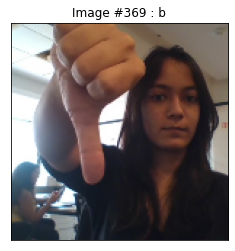

In [8]:

def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

display_random_image(class_names, train_images, train_labels)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [10]:

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)


Epoch 1/10
4/4 [==============================] - 7s 2s/step - loss: 2.1081 - accuracy: 0.1427 - val_loss: 1.6475 - val_accuracy: 0.2062
Epoch 2/10
4/4 [==============================] - 6s 1s/step - loss: 1.4582 - accuracy: 0.3527 - val_loss: 1.1224 - val_accuracy: 0.7320
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 0.9989 - accuracy: 0.8247 - val_loss: 0.6720 - val_accuracy: 0.8866
Epoch 4/10
4/4 [==============================] - 6s 1s/step - loss: 0.5362 - accuracy: 0.9166 - val_loss: 0.4276 - val_accuracy: 0.8969
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 0.2294 - accuracy: 0.9727 - val_loss: 0.2255 - val_accuracy: 0.9691
Epoch 6/10
4/4 [==============================] - 6s 1s/step - loss: 0.1425 - accuracy: 0.9610 - val_loss: 0.3117 - val_accuracy: 0.8763
Epoch 7/10
4/4 [==============================] - 6s 1s/step - loss: 0.1617 - accuracy: 0.9298 - val_loss: 0.0671 - val_accuracy: 0.9897
Epoch 8/10
4/4 [=========================

In [12]:

predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


print(pred_labels)


[1 1 1 1 1 1 1 1 4 4 4 4 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3]


2/2 - 0s - loss: 0.0218 - accuracy: 1.0000


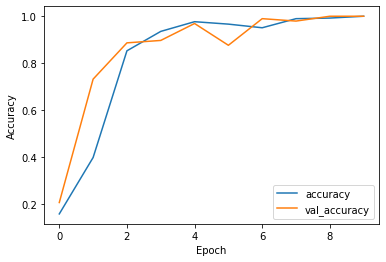

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


Increase the volume


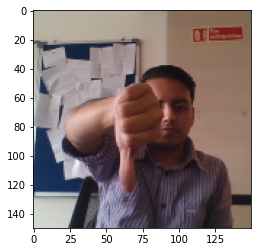

In [14]:
 
def mostFrequent(arr, n):
    arr.sort()
    max_count = 1; res = arr[0]; curr_count = 1
    for i in range(1, n):
        if (arr[i] == arr[i - 1]):
            curr_count += 1
        else :
            if (curr_count > max_count):
                max_count = curr_count
                res = arr[i - 1]
             
            curr_count = 1
    if (curr_count > max_count):
     
        max_count = curr_count
        res = arr[n - 1]
     
    return res
 


n = len(pred_labels)
predict= mostFrequent(pred_labels, n)
if predict==0:
	print("Increase the volume")
elif predict==1:
	print("Decrease the volume")
elif predict==2:
	print("'Jump' backwards 10 seconds")
elif predict==3:
	print("'Jump' forward 10 seconds")
else:
	print(" Pause the movie")
plt.imshow(test_images[0])
plt.show()
